In [1]:
import numpy as np
from sklearn.datasets import make_checkerboard
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

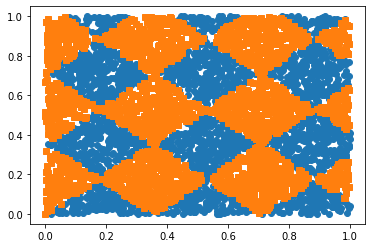

<Figure size 432x288 with 0 Axes>

In [11]:
def gen_cb(N, a, alpha): 
    """
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians 
    """
    d = np.random.rand(N, 2).T
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha), 
                              d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 


X, y = gen_cb(5000, .25, np.pi/4)
y -= 1
plt.figure()
plt.plot(X[y==0, 0], X[y==0, 1], 'o')
plt.plot(X[y==1, 0], X[y==1, 1], 's')
plt.show()
plt.clf()

In [12]:
prior = np.array([(y == 0).sum() / np.size(y), (y == 1).sum() / np.size(y)])
prior

array([0.5008, 0.4992])

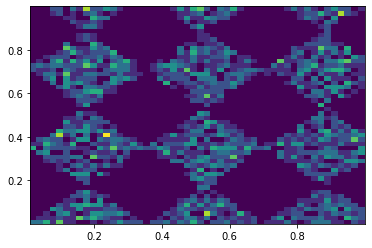

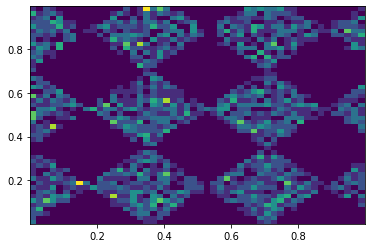

In [13]:
like = [0, 0]
like[0], x0, y0, fig0 = plt.hist2d(X[y==0, 0], X[y==0, 1], bins=50)
plt.show()
like[1], x1, y1, fig1 = plt.hist2d(X[y==1, 0], X[y==1, 1], bins=50)
plt.show()

In [14]:
evid = like[0] * prior[0] + like[1] * prior[1]

In [15]:
post = np.zeros((2, 50, 50))
post[0] = like[0] * prior[0] / evid
post[1] = like[1] * prior[1] / evid

/home/rafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/rafa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
post.shape

(2, 50, 50)

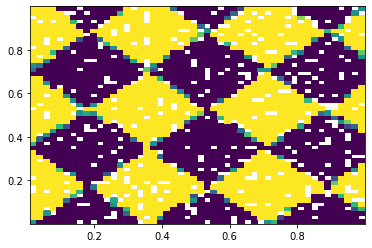

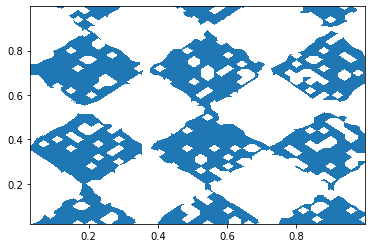

In [17]:
plt.pcolormesh(x0, y0, post[0])
plt.show()
plt.contourf(x0[1:], y0[1:], post[0], levels=1, colors=["tab:blue", "white"])

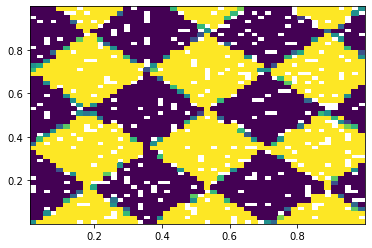

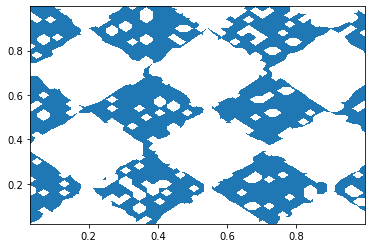

In [18]:
plt.pcolormesh(x0, y0, post[1])
plt.show()
plt.contourf(x0[1:], y0[1:], post[1], levels=1, colors=["tab:blue", "white"])

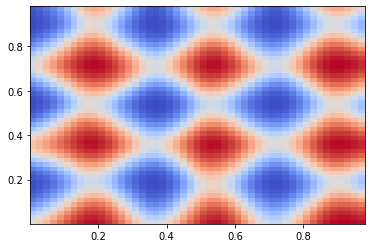

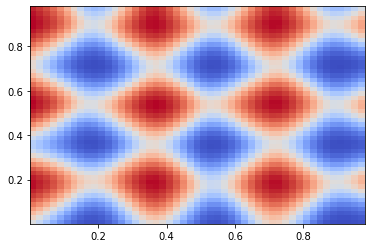

In [30]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zz = np.stack((xx.ravel(), yy.ravel()), axis=1)

like = [0, 0]
kerneldensity = KernelDensity(bandwidth=0.05)
kerneldensity.fit(X[y==0])
like[0] = np.exp(kerneldensity.score_samples(zz)).reshape((np.size(xx, 0), np.size(xx, 0)))

kerneldensity = KernelDensity(bandwidth=0.05)
kerneldensity.fit(X[y==1])
like[1] = np.exp(kerneldensity.score_samples(zz)).reshape((np.size(xx, 0), np.size(xx, 0)))

evid = like[0] * prior[0] + like[1] * prior[1]
post = np.zeros((2, np.size(xx, 0), np.size(xx, 0)))
post[0] = like[0] * prior[0] / evid
post[1] = like[1] * prior[1] / evid
plt.pcolormesh(xx, yy, post[0], cmap="coolwarm")
plt.show()
plt.pcolormesh(xx, yy, post[1], cmap="coolwarm")
plt.show()